In [39]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [2]:
df = pd.read_csv('cleaned---monthly_Without_aggregation.csv')
df.head()

,TIME,CONG
0,3/10/2018,0.486151
1,3/11/2018,0.531629
2,3/12/2018,0.524233
3,3/13/2018,0.516991
4,3/14/2018,0.515276


In [3]:
# df[] = df.astype(np.int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    297 non-null    object 
 1   CONG    297 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [5]:
df.columns = ['ds','y']

In [6]:
df.head()

,ds,y
0,3/10/2018,0.486151
1,3/11/2018,0.531629
2,3/12/2018,0.524233
3,3/13/2018,0.516991
4,3/14/2018,0.515276


In [7]:
df['ds'] = pd.to_datetime(df['ds'])

In [8]:
df.head()

,ds,y
0,2018-03-10,0.486151
1,2018-03-11,0.531629
2,2018-03-12,0.524233
3,2018-03-13,0.516991
4,2018-03-14,0.515276


In [9]:
# m = Prophet()
# m.fit(df)

In [10]:
# future = m.make_future_dataframe(periods=30, freq='D')

In [11]:
# future.tail()

In [12]:
df.tail()

,ds,y
292,2018-12-27,0.547179
293,2018-12-28,0.559387
294,2018-12-29,0.527377
295,2018-12-30,0.553414
296,2018-12-31,0.555048


In [13]:
len(df)

297

In [73]:
# len(future)

In [74]:
forecast = m.predict(future)

In [75]:
# forecast.head()

In [76]:
# forecast.columns

In [77]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(30)

,ds,yhat_lower,yhat_upper,yhat
266,2018-12-01,0.521994,0.571067,0.545234
267,2018-12-02,0.544616,0.594563,0.571201
268,2018-12-03,0.546868,0.594100,0.569936
269,2018-12-04,0.538759,0.587989,0.564187
270,2018-12-05,0.539523,0.589803,0.565652
271,2018-12-06,0.540631,0.589661,0.566323
272,2018-12-07,0.538526,0.586245,0.562337
273,2018-12-08,0.525665,0.575902,0.550727
274,2018-12-09,0.552436,0.601221,0.576695
275,2018-12-10,0.549532,0.599750,0.575430


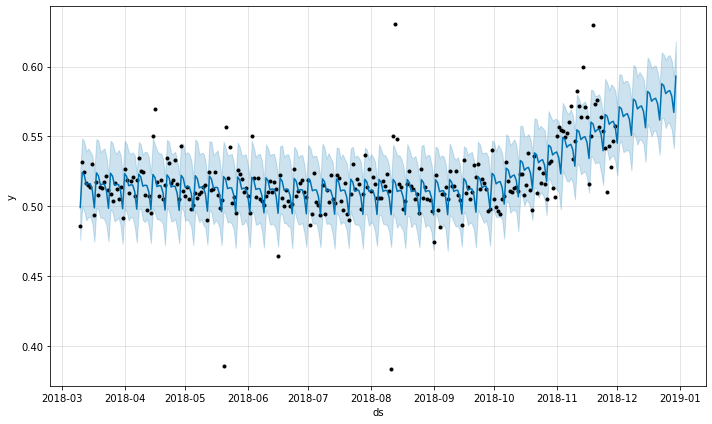

In [78]:
m.plot(forecast);

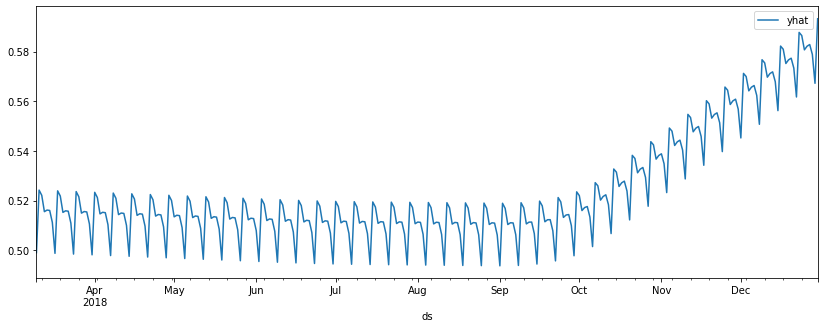

In [79]:
forecast.plot(x='ds',y='yhat',figsize=(14,5))

In [21]:
# m.plot_components(forecast);

In [22]:
len(df)

297

In [28]:
train = df.iloc[:266]
test = df.iloc[266:]

In [29]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=30, freq='D')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


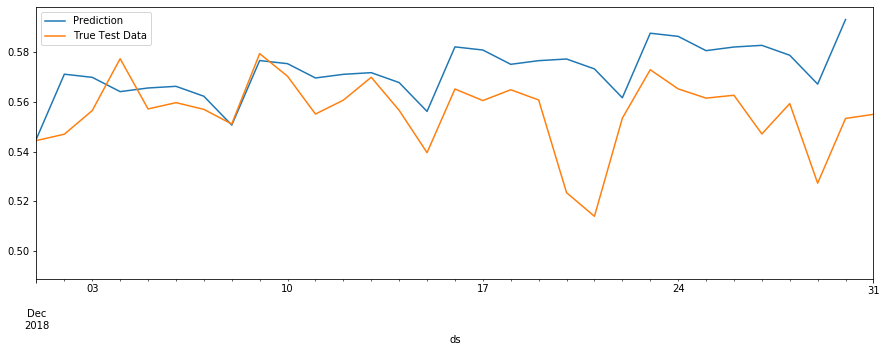

In [32]:
ax = forecast.plot(x='ds', y='yhat', label='Prediction', legend=True, figsize=(15,5))
test.plot(x='ds',y='y', label='True Test Data', legend=True, ax=ax, xlim=('2018-12-01','2018-12-31'))

In [31]:
test

,ds,y
266,2018-12-01,0.544516
267,2018-12-02,0.547063
268,2018-12-03,0.556577
269,2018-12-04,0.577431
270,2018-12-05,0.557224
271,2018-12-06,0.559759
272,2018-12-07,0.557056
273,2018-12-08,0.551163
274,2018-12-09,0.579481
275,2018-12-10,0.570351


In [34]:
predictions = forecast.iloc[-31:]['yhat']

In [35]:
predictions

265    0.556843
266    0.545234
267    0.571201
268    0.569936
269    0.564187
270    0.565652
271    0.566323
272    0.562337
273    0.550727
274    0.576695
275    0.575430
276    0.569681
277    0.571146
278    0.571816
279    0.567831
280    0.556221
281    0.582189
282    0.580923
283    0.575175
284    0.576640
285    0.577310
286    0.573324
287    0.561715
288    0.587683
289    0.586417
290    0.580668
291    0.582133
292    0.582804
293    0.578818
294    0.567208
295    0.593176
Name: yhat, dtype: float64

In [36]:
test['y']

266    0.544516
267    0.547063
268    0.556577
269    0.577431
270    0.557224
271    0.559759
272    0.557056
273    0.551163
274    0.579481
275    0.570351
276    0.555165
277    0.560755
278    0.569965
279    0.556672
280    0.539648
281    0.565243
282    0.560595
283    0.564944
284    0.560831
285    0.523552
286    0.514050
287    0.553504
288    0.572998
289    0.565297
290    0.561574
291    0.562727
292    0.547179
293    0.559387
294    0.527377
295    0.553414
296    0.555048
Name: y, dtype: float64

In [37]:
rmse(predictions,test['y'])

0.02472524319143248

In [38]:
test.mean()

y    0.555824
dtype: float64

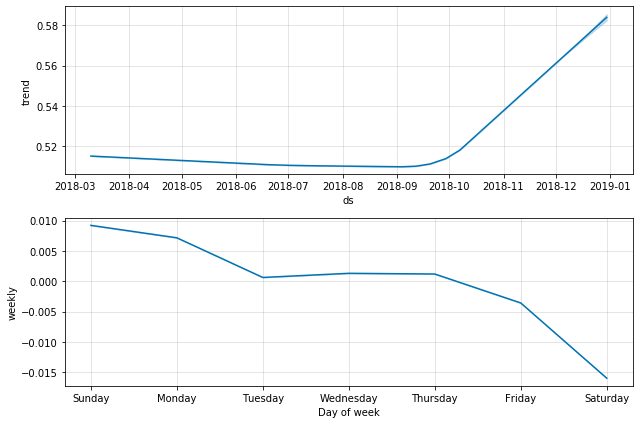

In [41]:
m.plot_components(forecast);

In [43]:
train.head(30)

,ds,y
0,2018-03-10,0.486151
1,2018-03-11,0.531629
2,2018-03-12,0.524233
3,2018-03-13,0.516991
4,2018-03-14,0.515276
5,2018-03-15,0.513442
6,2018-03-16,0.529972
7,2018-03-17,0.494025
8,2018-03-18,0.517023
9,2018-03-19,0.508026


In [56]:
initial = 5*30
initial = str(initial)+' days'

In [57]:
initial

'150 days'

In [58]:
period = 5*30
period = str(period)+' days'

In [59]:
period

'150 days'

In [62]:
horizon = 30
horizon = str(horizon)+' days'

In [63]:
horizon

'30 days'

In [65]:
df_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2018-10-31 00:00:00 and 2018-10-31 00:00:00


In [67]:
df_cv.head(30)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-11-01,0.515334,0.493828,0.537619,0.550425,2018-10-31
1,2018-11-02,0.510750,0.486902,0.534559,0.556759,2018-10-31
2,2018-11-03,0.498501,0.477243,0.521630,0.554842,2018-10-31
3,2018-11-04,0.525201,0.503765,0.546864,0.553771,2018-10-31
4,2018-11-05,0.522168,0.498998,0.544188,0.549769,2018-10-31
5,2018-11-06,0.515947,0.494909,0.537910,0.552424,2018-10-31
6,2018-11-07,0.516013,0.492431,0.537395,0.560004,2018-10-31
7,2018-11-08,0.515622,0.492202,0.537026,0.571848,2018-10-31
8,2018-11-09,0.511037,0.486559,0.535121,0.533991,2018-10-31
9,2018-11-10,0.498788,0.475730,0.519839,0.546661,2018-10-31


In [68]:
len(df_cv)

30

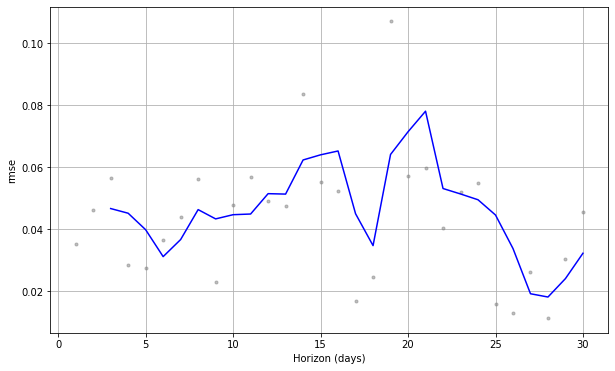

In [71]:
plot_cross_validation_metric(df_cv, metric='rmse');

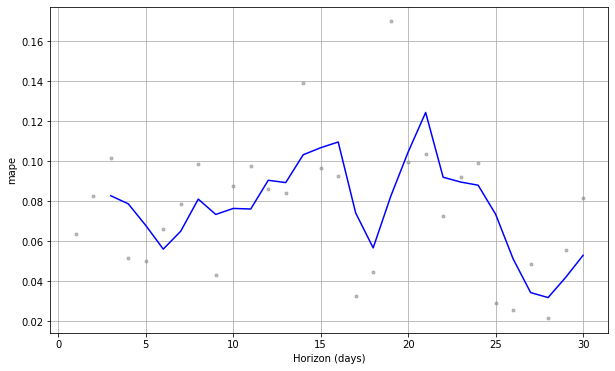

In [72]:
plot_cross_validation_metric(df_cv, metric='mape');